In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
dataset = load_iris()

In [14]:
X = dataset.data
y = dataset.target
X = np.hstack([X, np.ones((y.shape[0], 1))])
W = np.zeros((X.shape[1], 3))
enc = OneHotEncoder(sparse_output=False)
y = y.reshape(-1, 1)
y_enc = enc.fit_transform(y)
y_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [56]:
def training(X, y_enc, W, iters, alpha):
    costs = []
    for ite in range(iters):
        y_pred = softmax(logits(X, W))
        cost = np.mean(-np.log(y_pred[y_enc == 1]))
        new_w = np.dot(X.T, (y_pred - y_enc))
        W = W - alpha * new_w
        if (ite % 100 == 0):
            print(cost)
            costs.append(cost)
    return W, costs

In [17]:
def logits(X, W):
    return np.dot(X, W)

In [41]:
def softmax(logits):
    new_logits = logits - np.max(logits, axis = 1, keepdims = True)
    return np.exp(new_logits) / np.sum(np.exp(new_logits), axis = 1, keepdims = True)

In [59]:
new_w, costs = training(X, y_enc, W, 10000, 0.01)

1.0986122886681096
7.806983165646349
0.12111115725189658
0.11642610524179124
0.11208352031820706
0.1084574447595003
0.1055173940255395
0.10312282328122958
0.10112388930305932
0.09939861499224772
0.09786061644229499
0.09645352901665094
0.09514204544842782
0.09390422184911067
0.09272617190960374
0.09159877684637753
0.09051575111223419
0.08947253476066974
0.08846566752292585
0.08749243729695098
0.08655068263368804
0.08563868043075515
0.08475508006460997
0.08389886248811292
0.08306931269123341
0.08226599946930571
0.0814887594812569
0.08073768417560702
0.08001310893967163
0.07931560415022011
0.07864596787862686
0.07800521994358353
0.07739459686662993
0.07681554709222341
0.07626972558436526
0.07575898659004954
0.07528537293877743
0.07485109969211745
0.07445852923050796
0.0741101339361309
0.07380844149776701
0.07355595658594634
0.07335505141019906
0.07320781688493454
0.07311586656681646
0.0730800884541078
0.07310034695825313
0.07317515087453473
0.07330132410244672
0.07347374218176501
0.073685

In [52]:
y_pred = np.argmax(softmax(np.dot(X, new_w)), axis = 1)
np.mean(y.flatten() == y_pred) * 100

96.0

ValueError: x and y must have same first dimension, but have shapes (100,) and (101,)

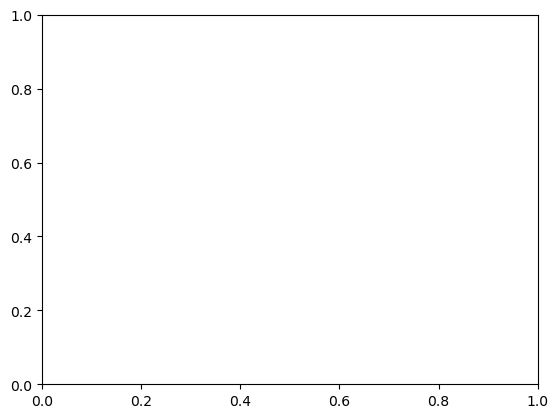

In [64]:
plt.plot(costs, np.arange(len(costs) + 1))